## Install the package dependencies before running this notebook

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob
import torch
import torch.nn as nn

"""
    number of trajectories in each city
    # austin --  train: 43041 test: 6325 
    # miami -- train: 55029 test:7971
    # pittsburgh -- train: 43544 test: 6361
    # dearborn -- train: 24465 test: 3671
    # washington-dc -- train: 25744 test: 3829
    # palo-alto -- train:  11993 test:1686

    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds
    
"""

'\n    number of trajectories in each city\n    # austin --  train: 43041 test: 6325 \n    # miami -- train: 55029 test:7971\n    # pittsburgh -- train: 43544 test: 6361\n    # dearborn -- train: 24465 test: 3671\n    # washington-dc -- train: 25744 test: 3829\n    # palo-alto -- train:  11993 test:1686\n\n    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds\n    \n'

## Create a Torch.Dataset class for the training dataset

In [100]:
from glob import glob
import pickle
import numpy as np

ROOT_PATH = ""

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):
    f_in = ROOT_PATH + split + "/" + city + "_inputs"
    inputs = pickle.load(open(f_in, "rb"))
    inputs = np.asarray(inputs)
    
    outputs = None
    
    if split=="train":
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)

    return inputs, outputs

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform

        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
count_train = 0
for i in cities:
    city = i  
    split = 'train'
    train_dataset  = ArgoverseDataset(city = city, split = split)
    count_train += len(train_dataset)
print("the number of training data:" + str(count_train))

count_test = 0
for i in cities:
    city = i  
    split = 'test'
    test_dataset  = ArgoverseDataset(city = city, split = split)
    count_test+= len(test_dataset)
print("the number of training data:" + str(count_test))

the number of training data:203816
the number of training data:29843


In [101]:
i,o = get_city_trajectories(city = cities[0])
for city in cities[1:]:
    a,b = get_city_trajectories(city = city)
    i = np.concatenate([i, a])
    o = np.concatenate([o, b])
for city in cities:
    a,b = get_city_trajectories(city = city, split = 'test')
    i = np.concatenate([i, a])

In [106]:
# if we use 1000 as interval
input_x =i[:,:,0].reshape(-1)
input_y = i[:,:,1].reshape(-1)
output_x = o[:,:,0].reshape(-1)
output_y = o[:,:,1].reshape(-1)

In [164]:
np.min(input_x)

-9222.61470641863

In [169]:
interval = 100

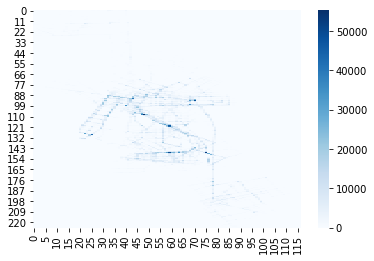

In [168]:
x_min = np.min(input_x)
y_min = np.min(input_y)
m = (np.max(input_x) - np.min(input_x))//interval
m= int(m+1)
n = (np.max(input_y) - np.min(input_y))//interval
n = int(n +1)
counter_map = np.zeros((m,n))
for _ in i:
    for p in _:
        temp_x = p[0]
        temp_y = p[1]
        temp_m = int((temp_x - x_min) // interval)
        temp_n = int((temp_y - y_min) // interval)
        counter_map[temp_m][temp_n] += 1
import numpy as np
import seaborn as sns
ax = sns.heatmap(counter_map, cmap = 'Blues')

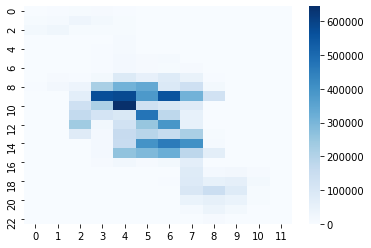

In [162]:
x_min = np.min(output_x)
y_min = np.min(output_y)
m = (np.max(output_x) - np.min(output_x))//interval
m= int(m+1)
n = (np.max(output_y) - np.min(output_y))//interval
n = int(n +1)
counter_map = np.zeros((m,n))
for _ in o:
    for p in _:
        temp_x = p[0]
        temp_y = p[1]
        temp_m = int((temp_x - x_min) // interval)
        temp_n = int((temp_y - y_min) // interval)
        counter_map[temp_m][temp_n] += 1
import numpy as np
import seaborn as sns
ax = sns.heatmap(counter_map, cmap = 'Blues')

In [153]:
def _heatmap_city(city, interval, ax, inp = True):
        i,o = get_city_trajectories(city = city)
        a,b = get_city_trajectories(city = city, split ='test')
        i = np.concatenate([i, a])
        
        input_x =i[:,:,0].reshape(-1)
        input_y = i[:,:,1].reshape(-1)
        output_x = o[:,:,0].reshape(-1)
        output_y = o[:,:,1].reshape(-1)
        if not inp:
            x_min = np.min(output_x)
            y_min = np.min(output_y)

            m = (np.max(output_x) - np.min(output_x))//interval
            m = int(m+1)
            n = (np.max(output_y) - np.min(output_y))//interval
            n = int(n +1)
            counter_map = np.zeros((m,n))
        
            for _ in i:
                for p in _:
                    temp_x = p[0]
                    temp_y = p[1]
                    temp_m = int((temp_x - x_min) // interval)
                    temp_n = int((temp_y - y_min) // interval)
                    counter_map[temp_m][temp_n] += 1
            ax = sns.heatmap(counter_map, cmap = 'Blues', ax = axes[ax,1])
            ax.set_title("output distribution at city {}".format(city))
        else:
            x_min = np.min(input_x)
            y_min = np.min(input_y)

            m = (np.max(input_x) - np.min(input_x))//interval
            m = int(m+1)
            n = (np.max(input_y) - np.min(input_y))//interval
            n = int(n +1)
            counter_map = np.zeros((m,n))
        
            for _ in i:
                for p in _:
                    temp_x = p[0]
                    temp_y = p[1]
                    temp_m = int((temp_x - x_min) // interval)
                    temp_n = int((temp_y - y_min) // interval)
                    counter_map[temp_m][temp_n] += 1
            ax = sns.heatmap(counter_map, cmap = 'Blues', ax = axes[ax,0])
            ax.set_title("input distribution at city {}".format(city))
            
    
    

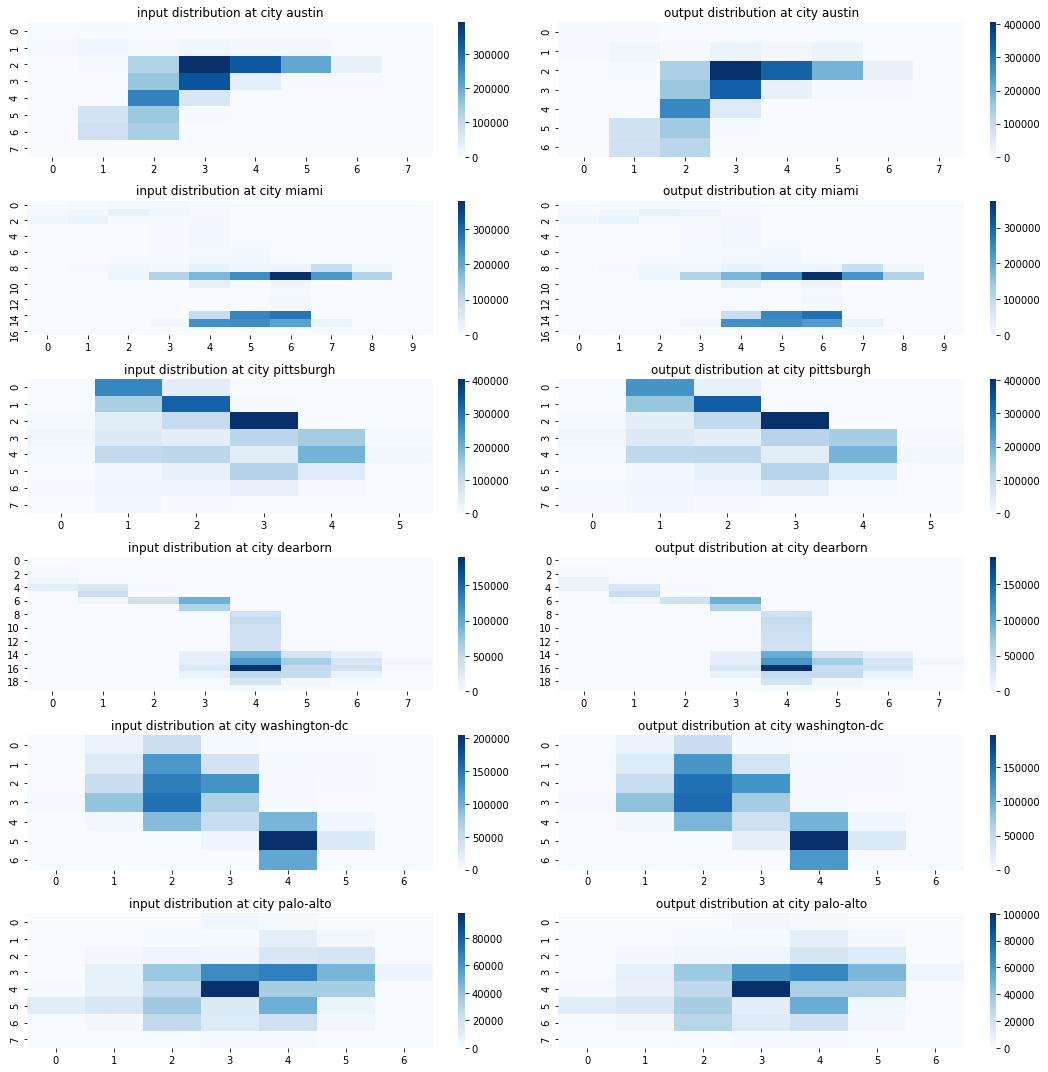

In [159]:
nrows = 12
n_cols = 2
fig, axes = plt.subplots(nrows=int(np.ceil(nrows/n_cols)), 
                         ncols=n_cols, 
                         figsize=(15,15))

for inx, city in enumerate (cities):
    _heatmap_city(city = city, interval = 1000, ax = inx)
for inx, city in enumerate (cities):
    _heatmap_city(city = city, interval = 1000, ax = inx, inp = False)
plt.tight_layout()
  
    

## Create a DataLoader class for training

In [5]:
batch_sz = 4  # batch size 
train_loader = DataLoader(train_dataset,batch_size=batch_sz)

## Sample a batch of data and visualize 

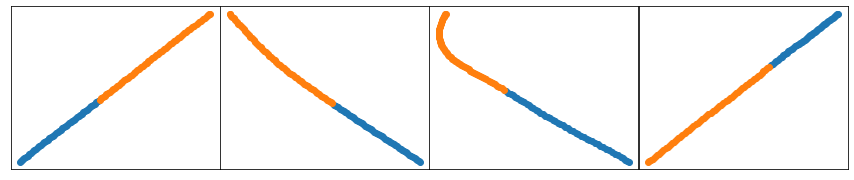

In [6]:
import matplotlib.pyplot as plt
import random


def show_sample_batch(sample_batch):
    """visualize the trajectory for a batch of samples"""
    inp, out = sample_batch
    batch_sz = inp.size(0)
    agent_sz = inp.size(1)
    
    fig, axs = plt.subplots(1,batch_sz, figsize=(15, 3), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()   
    for i in range(batch_sz):
        axs[i].xaxis.set_ticks([])
        axs[i].yaxis.set_ticks([])
        
        # first two feature dimensions are (x,y) positions
        axs[i].scatter(inp[i,:,0], inp[i,:,1])
        axs[i].scatter(out[i,:,0], out[i,:,1])

        
for i_batch, sample_batch in enumerate(train_loader):
    inp, out = sample_batch
    """
    TODO:
      implement your Deep learning model
      implement training routine
    """
    show_sample_batch(sample_batch)
    break

# The following sections are for training model

In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import torch
import torch.nn as nn
import torch.nn.functional as F

In [334]:
# def denormalize(dataset,dit):
#     x = dataset[:,:,0] * dit['x_std'] + dit['x_mean']
#     y = dataset[:,:,1] *dit['y_std'] + dit['y_mean']
#     dataset = np.concatenate([x,y], axis=2)
#     return dataset
    

In [335]:
# def normalize(dataset):
#     x_mean = np.mean(dataset[:,:,0]).reshape(-1)
#     x_std = np.std(dataset[:,:,0]).reshape(-1)
#     x_norm = ((dataset[:, :, 0].reshape(-1) - x_mean) / x_std).reshape(dataset.shape[0], dataset.shape[1], 1)
    
#     y_mean = np.mean(dataset[:,:,1]).reshape(-1)
#     y_std = np.std(dataset[:,:,1]).reshape(-1)
#     y_norm = ((dataset[:, :, 1].reshape(-1) - x_mean) / x_std).reshape(dataset.shape[0], dataset.shape[1], 1)
#     normalized = np.concatenate([x_norm, y_norm], axis=2)
#     return normalized, {'x_mean':x_mean, 'x_std': x_std, 'y_mean': y_mean, 'y_std': y_std}
    

In [447]:
from glob import glob
import pickle
import numpy as np

ROOT_PATH = "./"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):

    
    outputs = None
    dit_inp = None
    dit_out = None
    
    if split=="train":
        f_in = ROOT_PATH + split + "/" + city + "_inputs"
        inputs = pickle.load(open(f_in, "rb"))
        n = len(inputs)
        inputs = np.asarray(inputs)[:int(n * 0.8)].astype(np.float32)
        
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)[:int(n * 0.8)].astype(np.float32)
        
    elif split == 'val':
        f_in = ROOT_PATH + 'train' + "/" + city + "_inputs"
        inputs = pickle.load(open(f_in, "rb"))
        n = len(inputs)
        inputs = np.asarray(inputs)[int(n * 0.8):].astype(np.float32)
        
        f_out = ROOT_PATH + 'train' + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)[int(n * 0.8):].astype(np.float32)
    
    else:
        f_in = ROOT_PATH + split + "/" + city + "_inputs"
        inputs = pickle.load(open(f_in, "rb"))
        n = len(inputs)
        inputs = np.asarray(inputs)
#     if normalized:
#         inputs, dit_inp = normalize(inputs)
#         outputs, dit_out = normalize(outputs)
        

    return inputs, outputs, dit_inp, dit_out

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform

        self.inputs, self.outputs, self.dit_int, self.dit_out = get_city_trajectories(city=city, split=split, normalized=False)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset example
city = 'palo-alto' 
split = 'train'
train_dataset  = ArgoverseDataset(city = city, split = split)

In [456]:
class EncoderRNN(nn.Module):
    """Encoder Network."""
    def __init__(self,
                 input_size = 2,
                 embedding_size = 16,
                 hidden_size = 32,
                    num_layers = 1):
        """Initialize the encoder network.
        Args:
            input_size: number of features in the input
            embedding_size: Embedding size
            hidden_size: Hidden size of LSTM
        """
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.layers = num_layers

        self.linear1 = nn.Linear(input_size, embedding_size)
        self.lstm1 = nn.LSTM(embedding_size, hidden_size, batch_first = True)

    def forward(self, x, hidden):
        """Run forward propagation.
        Args:
            x: input to the network
            hidden: initial hidden state
        Returns:
            hidden: final hidden 
        """
        embedded = F.relu(self.linear1(x))
#         print("encoder embedded")
#         print(embedded)
#         embedded = x
#         print("embedded shape")
#         print(embedded.shape)
        _, hidden = self.lstm1(embedded, hidden)
#         print("encoder output")
#         print(_)
        return hidden

In [455]:
class DecoderRNN(nn.Module):
    """Decoder Network."""
    def __init__(self, encoder, embedding_size=16, hidden_size=32, output_size=2, num_layers = 1):
        """Initialize the decoder network.
        Args:
            embedding_size: Embedding size
            hidden_size: Hidden size of LSTM
            output_size: number of features in the output
        """
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.layers = num_layers
        self.linear1 = encoder.linear1
        self.lstm1 = nn.LSTM(embedding_size, hidden_size,batch_first = True)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        """Run forward propagation.
        Args:
            x: input to the network
            hidden: initial hidden state
        Returns:
            output: output from lstm
            hidden: final hidden state
        """
        embedded = F.relu(self.linear1(x))
#         print("decoder embedded")
#         print(embedded)
#         embedded = x
        out, hidden = self.lstm1(embedded, hidden)
        output = self.linear2(out)
#         output = output.reshape(len(output), 2)
        return output, hidden
    

In [457]:
def train(train_loader,
        print_every,
        epoches,
        batch_size,
        hidden_size,
        criterion,
        encoder,
        decoder, encoder_optimizer,decoder_optimizer):
    loss_lst = []
    "-------start training------"
    for epoch in range(epoches):
        print("epoch number is: {}".format(epoch))
        total_loss = 0
        
        for i_batch, sample_batch in enumerate(train_loader):
#             print("length of sample batch")
#             print(len(sample_batch[0]))
#             print(batch_size)
            if len(sample_batch[0]) < batch_size:
                break
            encoder.train()
            decoder.train()
            loss = 0
            inp, out  = sample_batch
#             print("inp shape")
#             print(inp.shape)
#             torch.autograd.set_detect_anomaly(True)
            encoder_hidden = (torch.zeros(1,batch_size, hidden_size), torch.zeros(1,batch_size, hidden_size))
    
            encoder_optimizer.zero_grad()
            decoder_optimizer.zero_grad()
            encoder_input = inp
            for ei in range(50):
                encoder_input = inp[:, ei, :].reshape(batch_size,1,2)
#                 print(encoder_input.shape)
#                 print("encoder hidden[0]")
#                 print(encoder_hidden[0].shape)
                encoder_hidden = encoder(encoder_input, encoder_hidden)
            
            decoder_input = encoder_input[:,-1:,:]
            decoder_hidden = encoder_hidden
            decoder_outputs = torch.zeros(out.shape)
            for di in range(60):
                decoder_output, decoder_hidden = decoder(decoder_input,
                                                         decoder_hidden)
                print(decoder_output)
#                 print(decoder_outputs[:, di, :].shape)

                decoder_outputs[:, di, :] = decoder_output.reshape(batch_size,2)
    
                
                # Update loss
#                 print(decoder_output[:, :2].reshape(batch_size,2).shape)
#                 print(out[:, di, :2].reshape(batch_size,2).shape)
            
#                 print(decoder_output.shape)
#                 print(inp[:, di, :2])
#                 print(decoder_output)
#                 print(out[:, di, :2])
                loss += criterion(decoder_output, out[:, di, :2])

#                 print("loss now is")
#                 print(loss)
                
                # Use own predictions as inputs at next step
                decoder_input = decoder_output.reshape(len(decoder_output), 1, 2)
            
#             encoder_hidden[0].detach()
#             encoder_hidden[1].detach()
#             decoder_hidden[0].detach()
#             decoder_hidden[1].detach()
            
            loss.backward()
            encoder_optimizer.step()
            decoder_optimizer.step()
            total_loss += loss.item()
            
        loss_lst.append(total_loss)
        if epoch % print_every == 0:
            print(f'at epoch {epoch} Loss: {total_loss}')
    print("----- Finish training -----")
    plt.plot(loss_lst)
    plt.ylabel('loss')
    plt.xlabel('iteration #')
    return encoder, decoder

            
            

epoch number is: 0
tensor([[[-0.4722,  0.3701]],

        [[-0.4468,  0.3189]],

        [[-0.6659,  0.3182]],

        ...,

        [[-0.6114,  0.1687]],

        [[-0.5140,  0.3262]],

        [[-0.5346,  0.2843]]], grad_fn=<AddBackward0>)
tensor([[[-0.1059,  0.2483]],

        [[-0.1000,  0.2016]],

        [[-0.2475,  0.1759]],

        ...,

        [[-0.2670,  0.1335]],

        [[-0.1249,  0.2064]],

        [[-0.2012,  0.2376]]], grad_fn=<AddBackward0>)
tensor([[[-0.1018,  0.1707]],

        [[-0.0882,  0.1261]],

        [[-0.2189,  0.1197]],

        ...,

        [[-0.2273,  0.0942]],

        [[-0.1113,  0.1300]],

        [[-0.1679,  0.1832]]], grad_fn=<AddBackward0>)
tensor([[[-0.1195,  0.1084]],

        [[-0.1101,  0.0746]],

        [[-0.2180,  0.0835]],

        ...,

        [[-0.2184,  0.0836]],

        [[-0.1209,  0.0784]],

        [[-0.1607,  0.1471]]], grad_fn=<AddBackward0>)
tensor([[[-0.1366,  0.0612]],

        [[-0.1304,  0.0374]],

        [[-0.2170,  0.0

tensor([[[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        ...,

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]]], grad_fn=<AddBackward0>)
tensor([[[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        ...,

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]]], grad_fn=<AddBackward0>)
tensor([[[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        ...,

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]]], grad_fn=<AddBackward0>)
tensor([[[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        ...,

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]]], grad_fn=<AddBackward0>)
tensor([[[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        [[-0.0312,  0.0074]],

        ...

tensor([[[-11.2562,  13.3207]],

        [[-11.2710,  13.3380]],

        [[-11.2154,  13.2788]],

        ...,

        [[-11.3904,  13.3981]],

        [[-11.2709,  13.3384]],

        [[-11.0276,  13.1910]]], grad_fn=<AddBackward0>)
tensor([[[-11.2610,  13.3238]],

        [[-11.2699,  13.3355]],

        [[-11.2173,  13.2802]],

        ...,

        [[-11.3900,  13.3993]],

        [[-11.2699,  13.3358]],

        [[-11.0282,  13.1910]]], grad_fn=<AddBackward0>)
tensor([[[-11.2630,  13.3247]],

        [[-11.2693,  13.3338]],

        [[-11.2188,  13.2815]],

        ...,

        [[-11.3889,  13.4001]],

        [[-11.2692,  13.3340]],

        [[-11.0284,  13.1910]]], grad_fn=<AddBackward0>)
tensor([[[-11.2640,  13.3251]],

        [[-11.2690,  13.3327]],

        [[-11.2203,  13.2827]],

        ...,

        [[-11.3875,  13.4007]],

        [[-11.2688,  13.3327]],

        [[-11.0281,  13.1912]]], grad_fn=<AddBackward0>)
tensor([[[-11.2645,  13.3254]],

        [[-11.2688,  13

tensor([[[-11.6210,  13.8154]],

        [[-11.6012,  13.7933]],

        [[-11.5728,  13.7672]],

        ...,

        [[-11.7412,  13.8752]],

        [[-11.6035,  13.7955]],

        [[-11.4865,  13.7169]]], grad_fn=<AddBackward0>)
tensor([[[-11.9445,  14.2989]],

        [[-11.9268,  14.2745]],

        [[-11.8959,  14.2488]],

        ...,

        [[-12.0690,  14.3519]],

        [[-11.9282,  14.2762]],

        [[-11.8635,  14.1566]]], grad_fn=<AddBackward0>)
tensor([[[-12.1473,  14.5904]],

        [[-12.1388,  14.5802]],

        [[-12.1104,  14.5539]],

        ...,

        [[-12.2868,  14.6696]],

        [[-12.1398,  14.5815]],

        [[-12.0820,  14.4204]]], grad_fn=<AddBackward0>)
tensor([[[-12.2010,  14.6673]],

        [[-12.1961,  14.6625]],

        [[-12.1701,  14.6371]],

        ...,

        [[-12.3502,  14.7605]],

        [[-12.1969,  14.6636]],

        [[-12.1413,  14.4925]]], grad_fn=<AddBackward0>)
tensor([[[-12.2129,  14.6839]],

        [[-12.2092,  14

tensor([[[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]],

        [[-24.8551,  26.9096]],

        ...,

        [[-24.8552,  26.9102]],

        [[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]]], grad_fn=<AddBackward0>)
tensor([[[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]],

        [[-24.8553,  26.9106]],

        ...,

        [[-24.8555,  26.9111]],

        [[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]]], grad_fn=<AddBackward0>)
tensor([[[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]],

        [[-24.8555,  26.9115]],

        ...,

        [[-24.8557,  26.9121]],

        [[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]]], grad_fn=<AddBackward0>)
tensor([[[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]],

        [[-24.8558,  26.9124]],

        ...,

        [[-24.8559,  26.9129]],

        [[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]]], grad_fn=<AddBackward0>)
tensor([[[-24.9705,  27.1864]],

        [[-24.9705,  27

tensor([[[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]],

        [[-24.9678,  27.1751]],

        ...,

        [[-24.9679,  27.1753]],

        [[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]]], grad_fn=<AddBackward0>)
tensor([[[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]],

        [[-24.9679,  27.1755]],

        ...,

        [[-24.9680,  27.1758]],

        [[-24.9705,  27.1864]],

        [[-24.9705,  27.1864]]], grad_fn=<AddBackward0>)
at epoch 2 Loss: 139485216.0
epoch number is: 3
tensor([[[-30.1452,  32.0741]],

        [[-30.2167,  32.1478]],

        [[-29.9170,  31.9138]],

        ...,

        [[-29.8740,  31.8176]],

        [[-30.2075,  32.1393]],

        [[-30.0716,  32.0684]]], grad_fn=<AddBackward0>)
tensor([[[-35.4214,  37.4998]],

        [[-35.4239,  37.5037]],

        [[-35.3095,  37.4319]],

        ...,

        [[-35.2998,  37.4245]],

        [[-35.4225,  37.5025]],

        [[-35.4537,  37.5333]]], grad_fn=<AddBackward0>)
tensor([

tensor([[[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        ...,

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]]], grad_fn=<AddBackward0>)
tensor([[[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        ...,

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]]], grad_fn=<AddBackward0>)
tensor([[[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        ...,

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]]], grad_fn=<AddBackward0>)
tensor([[[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        ...,

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]],

        [[-36.2670,  38.4674]]], grad_fn=<AddBackward0>)
tensor([[[-36.2670,  38.4674]],

        [[-36.2670,  38

tensor([[[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]],

        [[-48.7467,  50.9657]],

        ...,

        [[-48.7467,  50.9657]],

        [[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]]], grad_fn=<AddBackward0>)
tensor([[[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]],

        [[-48.7467,  50.9657]],

        ...,

        [[-48.7467,  50.9657]],

        [[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]]], grad_fn=<AddBackward0>)
tensor([[[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]],

        [[-48.7467,  50.9657]],

        ...,

        [[-48.7467,  50.9657]],

        [[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]]], grad_fn=<AddBackward0>)
tensor([[[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]],

        [[-48.7467,  50.9657]],

        ...,

        [[-48.7467,  50.9657]],

        [[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]]], grad_fn=<AddBackward0>)
tensor([[[-48.3152,  50.6427]],

        [[-48.3152,  50

tensor([[[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]],

        [[-48.7467,  50.9657]],

        ...,

        [[-48.7467,  50.9657]],

        [[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]]], grad_fn=<AddBackward0>)
tensor([[[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]],

        [[-48.7467,  50.9657]],

        ...,

        [[-48.7467,  50.9657]],

        [[-48.3152,  50.6427]],

        [[-48.3152,  50.6427]]], grad_fn=<AddBackward0>)
tensor([[[-48.3154,  50.6428]],

        [[-48.3154,  50.6428]],

        [[-48.7467,  50.9657]],

        ...,

        [[-48.7467,  50.9657]],

        [[-48.3154,  50.6428]],

        [[-48.3154,  50.6428]]], grad_fn=<AddBackward0>)
tensor([[[-48.3163,  50.6435]],

        [[-48.3163,  50.6435]],

        [[-48.7467,  50.9657]],

        ...,

        [[-48.7467,  50.9657]],

        [[-48.3163,  50.6435]],

        [[-48.3163,  50.6435]]], grad_fn=<AddBackward0>)
tensor([[[-48.3230,  50.6485]],

        [[-48.3230,  50

tensor([[[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        ...,

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]]], grad_fn=<AddBackward0>)
tensor([[[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        ...,

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]]], grad_fn=<AddBackward0>)
tensor([[[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        ...,

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]]], grad_fn=<AddBackward0>)
tensor([[[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        ...,

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]]], grad_fn=<AddBackward0>)
tensor([[[-61.5374,  63.8066]],

        [[-61.5374,  63

tensor([[[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        ...,

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]]], grad_fn=<AddBackward0>)
tensor([[[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        ...,

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]]], grad_fn=<AddBackward0>)
tensor([[[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        ...,

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]]], grad_fn=<AddBackward0>)
tensor([[[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        ...,

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]],

        [[-61.5374,  63.8066]]], grad_fn=<AddBackward0>)
tensor([[[-61.5374,  63.8066]],

        [[-61.5374,  63

tensor([[[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        ...,

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]]], grad_fn=<AddBackward0>)
tensor([[[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        ...,

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]]], grad_fn=<AddBackward0>)
tensor([[[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        ...,

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]]], grad_fn=<AddBackward0>)
tensor([[[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        ...,

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]],

        [[-74.3913,  76.6794]]], grad_fn=<AddBackward0>)
tensor([[[-74.3913,  76.6794]],

        [[-74.3913,  76

tensor([[[-87.8969,  90.2256]],

        [[-87.8970,  90.2257]],

        [[-87.8971,  90.2261]],

        ...,

        [[-87.8968,  90.2258]],

        [[-87.8970,  90.2257]],

        [[-87.8967,  90.2254]]], grad_fn=<AddBackward0>)
tensor([[[-87.9227,  90.2519]],

        [[-87.9227,  90.2519]],

        [[-87.9227,  90.2520]],

        ...,

        [[-87.9226,  90.2519]],

        [[-87.9227,  90.2519]],

        [[-87.9226,  90.2519]]], grad_fn=<AddBackward0>)
tensor([[[-87.9264,  90.2557]],

        [[-87.9264,  90.2557]],

        [[-87.9264,  90.2557]],

        ...,

        [[-87.9264,  90.2557]],

        [[-87.9264,  90.2557]],

        [[-87.9264,  90.2557]]], grad_fn=<AddBackward0>)
tensor([[[-87.9270,  90.2563]],

        [[-87.9270,  90.2563]],

        [[-87.9270,  90.2563]],

        ...,

        [[-87.9270,  90.2563]],

        [[-87.9270,  90.2563]],

        [[-87.9270,  90.2563]]], grad_fn=<AddBackward0>)
tensor([[[-87.9271,  90.2564]],

        [[-87.9271,  90

tensor([[[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        ...,

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]]], grad_fn=<AddBackward0>)
tensor([[[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        ...,

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]]], grad_fn=<AddBackward0>)
tensor([[[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        ...,

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]]], grad_fn=<AddBackward0>)
tensor([[[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        ...,

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]],

        [[-87.9271,  90.2564]]], grad_fn=<AddBackward0>)
tensor([[[-87.9271,  90.2564]],

        [[-87.9271,  90

tensor([[[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        ...,

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]]], grad_fn=<AddBackward0>)
tensor([[[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        ...,

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]]], grad_fn=<AddBackward0>)
tensor([[[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        ...,

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]]], grad_fn=<AddBackward0>)
tensor([[[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        ...,

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]]], grad_fn=<AddBackward0>)
tensor([

tensor([[[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        ...,

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]]], grad_fn=<AddBackward0>)
tensor([[[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        ...,

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]]], grad_fn=<AddBackward0>)
tensor([[[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        ...,

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]]], grad_fn=<AddBackward0>)
tensor([[[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        ...,

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]],

        [[-101.6118,  104.0853]]], grad_fn=<AddBackward0>)
tensor([

tensor([[[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        ...,

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]]], grad_fn=<AddBackward0>)
tensor([[[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        ...,

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]]], grad_fn=<AddBackward0>)
tensor([[[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        ...,

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]]], grad_fn=<AddBackward0>)
tensor([[[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        ...,

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]]], grad_fn=<AddBackward0>)
tensor([

tensor([[[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        ...,

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]]], grad_fn=<AddBackward0>)
tensor([[[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        ...,

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]]], grad_fn=<AddBackward0>)
tensor([[[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        ...,

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]]], grad_fn=<AddBackward0>)
tensor([[[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        ...,

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]],

        [[-115.1481,  117.6945]]], grad_fn=<AddBackward0>)
tensor([

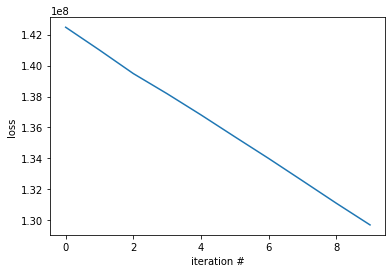

In [458]:
city = 'palo-alto' 
split = 'train'
train_dataset  = ArgoverseDataset(city = city, split = split)
batch_size = 5000
train_loader = DataLoader(train_dataset,batch_size = batch_size)
print_every = 1
epoches = 10

hidden_size = 512
criterion = nn.MSELoss()
encoder = EncoderRNN(hidden_size = hidden_size)
decoder = DecoderRNN(hidden_size = hidden_size,output_size=2, encoder = encoder)
encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr= 0.05)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr= 0.05)
encoder, decoder = train(train_loader, print_every, epoches, batch_size, hidden_size, \
                         criterion, encoder, decoder, encoder_optimizer,decoder_optimizer)


In [459]:
import torch
import torch.nn as nn
import torch.nn.functional as f 
import numpy as np 

In [460]:
def predict(encoder, decoder, inp,  predict_length = 60):
    encoder_hidden_initial= (torch.zeros(1,1, hidden_size), torch.zeros(1,1, hidden_size))
    encoder_hidden = encoder(inp, encoder_hidden_initial)
    decoder_input = inp[:,-1:,:]
    decoder_hidden = encoder_hidden
    decoder_outputs = torch.zeros((1,60,2))
    for di in range(predict_length):
        decoder_output, decoder_hidden = decoder(decoder_input,
                                                 decoder_hidden)
#                 print(decoder_output.shape)
#                 print(decoder_outputs[:, di, :].shape)
        decoder_outputs[:,di, :] = decoder_output.reshape(1,2)
    return decoder_outputs
    
    

In [461]:
inp, _, _, _ = get_city_trajectories(split = 'test')
for i in inp:
    print(i)
    print(predict(encoder, decoder, torch.tensor(i).float().reshape(1,50,2)))
    break
    

[[ 566.7580094  1909.85977658]
 [ 567.07167153 1909.61076666]
 [ 567.47438548 1909.29126789]
 [ 567.96185723 1908.90963684]
 [ 568.53214326 1908.46980629]
 [ 569.17372908 1907.97948155]
 [ 569.86913142 1907.45031937]
 [ 570.60519678 1906.89328104]
 [ 571.36003669 1906.32222512]
 [ 572.11700049 1905.75105439]
 [ 572.85269955 1905.19508631]
 [ 573.53848802 1904.67633242]
 [ 574.21716104 1904.16191424]
 [ 574.88792639 1903.65329973]
 [ 575.54763793 1903.14811859]
 [ 576.1949025  1902.64912993]
 [ 576.82961048 1902.15601029]
 [ 577.45274942 1901.66438309]
 [ 578.0621174  1901.17749004]
 [ 578.66709541 1900.69342013]
 [ 579.26788846 1900.21459198]
 [ 579.86112325 1899.74553196]
 [ 580.44737976 1899.28498276]
 [ 581.02007265 1898.83600659]
 [ 581.58066277 1898.39922343]
 [ 582.13407679 1897.97046021]
 [ 582.67446263 1897.55053013]
 [ 583.20403705 1897.14109664]
 [ 583.72044485 1896.73950229]
 [ 584.22072953 1896.34995574]
 [ 584.70429701 1895.97353424]
 [ 585.17662741 1895.60794303]
 [ 585.6

In [363]:
class EncoderRNN(nn.Module):
    """Encoder Network."""
    def __init__(self,
                 input_size = 2,
                 embedding_size = 8,
                 hidden_size = 16):
        """Initialize the encoder network.
        Args:
            input_size: number of features in the input
            embedding_size: Embedding size
            hidden_size: Hidden size of LSTM
        """
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.linear1 = nn.Linear(input_size, embedding_size)
        self.lstm1 = nn.LSTM(embedding_size, hidden_size, batch_first = True)

    def forward(self, x, hidden):
        """Run forward propagation.
        Args:
            x: input to the network
            hidden: initial hidden state
        Returns:
            hidden: final hidden 
        """
        embedded = F.relu(self.linear1(x))
#         print("embedded shape")
#         print(embedded.shape)
        _,hidden = self.lstm1(embedded, hidden)
        return hidden

In [ ]:
class RNN_MLP(nn.Module):
     def __init__(self,encoder, mlp_layers):
        super(RNN_MLP, self).__init__()
        self.encoder = encoder
        self.mlp_layers = mlp_layers
        
        
        
    

In [101]:
class RNN_MLP(nn.Module):
    def __init__(self,encoder):
        super(RNN_MLP, self).__init__()

        self.args = args

        self.device = args["device"]
        self.batch_size = args["batch_size"]
        self.input_dim = args["input_dim"]

        self.hidden_size = args["hidden_size"]
        self.recurrent_layer = args["recurrent_layer"]
        self.mlp_layers = args["mlp_layers"]
        self.output_size = args["output_size"]

        # self.encoder = nn.LSTM(input_size = self.input_dim,hidden_size = self.hidden_size,num_layers = self.recurrent_layer,batch_first = True,dropout = 0.1)
        self.encoder = nn.LSTM(input_size = self.input_dim,hidden_size = self.hidden_size,num_layers = self.recurrent_layer,batch_first = True)

        self.mlp = nn.Sequential()

        

        self.mlp.add_module("layer0",nn.Linear(self.hidden_size,self.mlp_layers[0]))


        self.mlp.add_module("relu0",  nn.ReLU())
        for i in range(1,len(self.mlp_layers)):
            self.mlp.add_module("layer{}".format(i),nn.Linear(self.mlp_layers[i-1],self.mlp_layers[i]))
            self.mlp.add_module("relu{}".format(i), nn.ReLU())
            # self.mlp.add_module("dropout{}".format(i), nn.Dropout(0.1))

            
            
        self.mlp.add_module("layer{}".format(len(self.mlp_layers)), nn.Linear(self.mlp_layers[-1],self.output_size))
    def forward(self,x,h,c):
        x = x[0]
        x = x.squeeze(1)


#         h = self.init_hidden_state(x.size()[0])
        output,h,c = self.encoder(x,h,c)
        output = output[:,-1]

        x = self.mlp(output).view(x.size()[0],1,int(self.output_size/self.input_dim),self.input_dim)       
        return x,h,c

    def init_hidden_state(self,batch_size):
        # print(self.batch_size)
        h_0 = torch.rand(self.recurrent_layer,batch_size,self.hidden_size).to(self.device)
        c_0 = torch.rand(self.recurrent_layer,batch_size,self.hidden_size).to(self.device)

        return (h_0,c_0)
        
        
        
        
    


In [108]:
args = {'device':'cpu', 'batch_size':100, 'input_dim':2, 'hidden_size':16, 'recurrent_layer':1, 
        "mlp_layers":[64,128], 'output_size':2, 'lr': 0.01, 'weight_decay':0}
net = RNN_MLP(args)
optimizer = torch.optim.Adam(net.parameters(),lr = args["lr"],weight_decay = args['weight_decay'])
criterion = nn.MSELoss()



In [ ]:
def train_RNN_MLP(train_loader,
        model
        print_every,
        epoches,
        batch_size,
        hidden_size,
        criterion,
        optimizer):
    loss_lst = []
    for epoch in range(epoches):
        loss = 0
        for i_batch, sample_batch in enumerate(train_loader):
            inp, out  = sample_batch
            h,c = mode.init_hidden_state(batch_size)
            otimizer.zero_grad()
            for ei in range(50):
                _input = inp[:, ei, :]
                out, h, c= model(_input, h, c)
                
            decoder_input = encoder_input
            decoder_hidden = encoder_hidden
            decoder_outputs = torch.zeros(out.shape)
            for di in range(60):
                decoder_output, decoder_hidden = decoder(decoder_input,
                                                         decoder_hidden)
                decoder_outputs[:, di, :] = decoder_output

                # Update loss
                loss += criterion(decoder_output[:, :2], out[:, di, :2])
                
                # Use own predictions as inputs at next step
                decoder_input = decoder_output
                
            loss.backward(retain_graph=True)
            encoder_optimizer.step()
            decoder_optimizer.step()
        loss_lst.append(loss)
        if epoch % print_every == 0:
            print(f'at epoch {epoch} Loss: {loss}')
    plt.plot(loss_lst)
    plt.ylabel('loss')
    plt.xlabel('iteration #')
    return encoder, decoder